In [2]:
import numpy as np
import matplotlib.pyplot as plt

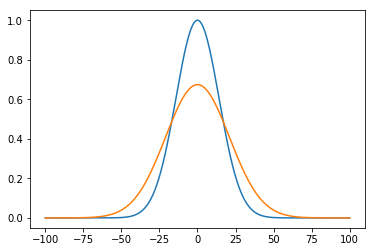

In [4]:
def diffusive_step(f, c, dx, dt) :
    """
    Function to compute the solution to the diffusion
    equation at the next timestep using Euler's method
    and a right-handed finite differencing scheme with
    Dirichlet boundary conditions.
    
    Accepts parameters:
    f: 1-d array containing function values
    c: wave speed
    dx: spacing between points of f
    dt: size of timestep
    """
    f_new = np.zeros_like(f)
    
    # Center-difference for laplacipn of f
    f_lap = (f[2:] - 2*f[1:-1] + f[:-2]) / dx**2
    
    # Forward-Euler time step for all points except the boundaries
    f_new[1:-1] = f[1:-1] + dt*c*f_lap
    
    # Apply boundary conditions
    f_new[0] = f_new[-2]
    f_new[-1] = f_new[1]
    
    return f_new

# We can also take a larger number of timesteps.
# We do not bother to store intermediate steps.

xs = np.linspace(-100, 100, 1000)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 120 # specify a final time.
n_steps = int(t_final / dt)
c = 1

f_ini = np.exp(-xs**2/20**2)
f = f_ini
for n in range(n_steps) :
    f = diffusive_step(f, c, dx, dt)
    
plt.plot(xs, f_ini)
plt.plot(xs, f)

If we change $c$ to be negative, we have an inverse diffusion problem. This problem is unstable, for the reason that small errors are amplified, as can be shown by a stability analysis.

Physically, when $c$ is negative, this is equivalent to having a negative $\Delta t$, so we are attempting to find a heat distribution that resulted in the one we have. This corresponds to interpreting small errors as originally having been larger, subsequently diffused away, so errors are amplified.

The problem also becomes ill-posed in some cases. For example, if we set up a system with a delta-function temperature distribution (zero everywhere, and non-zero at one point), there is no diffusive process which could have produced this distribution, so it is unphysical to attempt to determine an earlier state of the system.